In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('processed data.csv')

In [2]:
data

,DOEID,EUI,GNDHDD65,HDD30YR,HDD65,TOTSQFT_EN,HDD50,CDD65,CDD30YR,CDD80,...,ZFUELH2O,ZTEMPGONE,ZELAMOUNT,ZWINFRAME,CWASHER,INTERNET,ENERGYASST,ZHOUSEHOLDER_RACE,THERMAIN,ZAGERFRI1
0,10003,42.197622,1860.23,2714,2263,2288,634,2235,2059,126,...,0,0,0,0,1,1,0,0,1,0
1,10012,75.777632,3592.98,4740,4007,600,1473,1706,1143,103,...,0,0,0,0,1,1,0,0,1,0
2,10013,27.156101,488.23,1593,1327,1884,233,2935,2650,301,...,0,0,0,0,1,1,0,0,1,0
3,10015,35.265399,5884.26,6073,5274,4308,2384,1053,760,12,...,0,0,0,0,1,1,0,0,1,0
4,10019,43.084462,4534.77,4748,3927,1664,814,521,254,1,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,15637,34.347133,7044.57,5794,4260,3186,1667,1521,1101,134,...,0,0,0,0,1,1,0,0,1,0
983,15653,30.174223,1915.42,1496,1068,2340,69,2240,1938,202,...,0,0,0,0,1,1,0,0,1,0
984,15669,48.463232,4769.33,5406,5200,1438,2466,1132,1039,0,...,0,0,1,0,0,0,0,0,0,1
985,15673,31.628716,6667.08,6638,6606,1307,3361,621,539,0,...,1,0,1,1,0,1,0,0,0,1


In [3]:
X = data.iloc[:,2:].values
Y = data.iloc[:,1].values

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(X, Y)
reg.predict(X)
y_pred_linear = reg.predict(X)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y, y_pred_linear))

Mean squared error: 144.92


In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std_data = ss.fit_transform(np.c_[Y, X])
std_X = std_data[:,1:]
std_Y = std_data[:,0]

In [6]:
# Split the targets into training/testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(std_X, std_Y, test_size=0.2, random_state=20)
reg = LinearRegression().fit(X_train, Y_train)
std_y_pred_linear = reg.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, std_y_pred_linear))

Mean squared error: 0.75


In [7]:
from sklearn import linear_model
lasso_cv=linear_model.LassoCV(cv=5)
lasso_cv.fit(X_train, Y_train)
optimal_alpha = lasso_cv.alpha_
print(optimal_alpha)

lasso=linear_model.Lasso(alpha = optimal_alpha)
lasso.fit(X_train, Y_train)
y_pred_ll = lasso.predict(X_test)
# The coefficients
print("Coefficients: \n", lasso.coef_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(Y_test, y_pred_ll))

C:\Users\李杰夫\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.097841426028765, tolerance: 0.07228768635499512
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\李杰夫\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08050384037937874, tolerance: 0.07228768635499512
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\李杰夫\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07523938529698171, tolerance: 0.07228768635499512
  model = cd_fast.enet_coordinate_descent_gram(


0.027987782516135023
Coefficients: 
 [ 1.28913936e-01  0.00000000e+00  3.74067833e-02 -5.75911787e-01
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  3.76172919e-03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.62322553e-03
 -0.00000000e+00  0.00000000e+00  1.12477913e-01  0.00000000e+00
 -1.12602195e-02  0.00000000e+00 -0.00000000e+00  3.68944871e-02
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.19615573e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.62030735e-02  0.00000000e+00  2.24032656e-02 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -2.79519851e-03 -0.00000000e+00
 -0.00000000e+00 -1.05807015e-01 -0.00000000e+00 -0.00000000e+00
  6.33488776e-03 -0.00000000e+00  6.01868841e-04 -0.0

C:\Users\李杰夫\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1246618341457264, tolerance: 0.062444420088390816
  model = cd_fast.enet_coordinate_descent_gram(


In [8]:
feature = data.columns[2:]
# Filtering columns with weights other than 0
columns_to_keep = feature[lasso.coef_ != 0]
columns_to_keep = columns_to_keep.insert(0, 'EUI')
columns_to_keep

Index(['EUI', 'GNDHDD65', 'HDD65', 'TOTSQFT_EN', 'AGERFRI2', 'AGEFRZR',
       'WINDOWS', 'STORIES', 'WWACAGE', 'TEMPNITE', 'TEMPHOME', 'OVENUSE',
       'ESLIGHT', 'DIVISION', 'SEPOVENUSE', 'MONTUB', 'OVENFUEL',
       'YEARMADERANGE', 'STOVEFUEL', 'ROOFTYPE', 'FUELAUX', 'FUELH2O',
       'FUELTUB', 'FUELHEAT', 'NHSLDMEM', 'PERIODNG', 'COMBODVR', 'NUMTABLET',
       'NUMFLOORFAN', 'FUELH2O2', 'NUMMEAL', 'EQUIPMUSE', 'ZBASEHEAT',
       'ZUPRTFRZR', 'ZTYPERFR2', 'WINFRAME', 'ZAGECENAC', 'ZWWACAGE',
       'NUMATTICFAN', 'DOOR1SUM', 'ZDWASHUSE', 'SCALEB', 'TYPEHUQ',
       'ZUSENOTMOIST', 'DRAFTY', 'PAYHELP', 'DESKTOP', 'ADQINSUL', 'POOL',
       'ZTEMPHOMEAC', 'UATYP10', 'NHAFBATH', 'ICE', 'ENERGYASSTOTH',
       'ZMORETHAN1H2O', 'UGOTH', 'ELWARM', 'OUTGRILL', 'ZTOTSQFT_EN',
       'TOASTOVN', 'ZNOHEATHELP', 'METROMICRO', 'ZFUELPOOL', 'FOODPROC',
       'MICRO', 'ZSEPDVR', 'ZTVONWE1', 'ZTEMPGONE', 'ZWINFRAME',
       'ZHOUSEHOLDER_RACE', 'THERMAIN'],
      dtype='object')

In [9]:
# Select the columns to keep
data = data[columns_to_keep]
data

,EUI,GNDHDD65,HDD65,TOTSQFT_EN,AGERFRI2,AGEFRZR,WINDOWS,STORIES,WWACAGE,TEMPNITE,...,METROMICRO,ZFUELPOOL,FOODPROC,MICRO,ZSEPDVR,ZTVONWE1,ZTEMPGONE,ZWINFRAME,ZHOUSEHOLDER_RACE,THERMAIN
0,42.197622,1860.23,2263,2288,3,-2,41,10,1,68,...,1,-2,0,2,1,0,0,0,0,1
1,75.777632,3592.98,4007,600,-2,-2,30,10,-2,68,...,1,-2,0,1,0,0,0,0,0,1
2,27.156101,488.23,1327,1884,42,-2,41,10,-2,65,...,1,-2,0,1,0,0,0,0,0,1
3,35.265399,5884.26,5274,4308,41,41,42,20,-2,60,...,1,-2,0,1,0,0,0,0,0,1
4,43.084462,4534.77,3927,1664,41,3,50,10,-2,60,...,1,-2,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,34.347133,7044.57,4260,3186,1,41,50,20,-2,68,...,1,-2,1,2,0,0,0,0,0,1
983,30.174223,1915.42,1068,2340,-2,-2,41,10,-2,75,...,1,-2,0,1,0,0,0,0,0,1
984,48.463232,4769.33,5200,1438,-2,-2,20,-2,3,69,...,1,-2,0,1,1,0,0,0,0,0
985,31.628716,6667.08,6606,1307,-2,-2,41,-2,-2,68,...,1,-2,0,1,0,0,0,1,0,0


In [10]:
X = data.iloc[:,1:].values
Y = data.iloc[:,0].values

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std_data = ss.fit_transform(np.c_[Y, X])
std_X = std_data[:,1:]
std_Y = std_data[:,0]

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Defining the model by using Linear Regression
model = LinearRegression()

# Initialise the list used to store MSEs and MAEs
train_mse = []
train_mae = []
test_mse = []
test_mae = []

# Define 10-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=999)

# Perform cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = std_X[train_index], std_X[test_index]
    y_train, y_test = std_Y[train_index], std_Y[test_index]
    
    # Training Models
    model.fit(X_train, y_train)
    
    # Prediction of training and test sets using the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Store to list
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

print("Train MSE scores:", train_mse)
print("Test MSE scores:", test_mse)
print("Train MAE scores:", train_mae)
print("Test MAE scores:", test_mae)

total_train_mae_mean = np.mean(train_mae)
total_train_mse_mean = np.mean(train_mse)
total_test_mae_mean = np.mean(test_mae)
total_test_mse_mean = np.mean(test_mse)

total_train_mae_std = np.std(train_mae)
total_train_mse_std = np.std(train_mse)
total_test_mae_std = np.std(test_mae)
total_test_mse_std = np.std(test_mse)
total_mean_dict = {'total_train_mae_mean':total_train_mae_mean, 'total_train_mse_mean':total_train_mse_mean, 'total_test_mae_mean':total_test_mae_mean, 'total_tset_mse_mean':total_test_mse_mean}
total_std_dict = {'total_train_mae_std':total_train_mae_std, 'total_train_mse_std':total_train_mse_std, 'total_test_mae_std':total_test_mae_std, 'total_tset_mse_std':total_test_mse_std}
print(total_mean_dict,total_std_dict)

Train MSE scores: [0.4109780680938601, 0.4039250159175081, 0.41121810526428515, 0.3844756596554116, 0.4030071145731799]
Test MSE scores: [0.47961323755927404, 0.5062256228180328, 0.45435036059658196, 0.5719671981581422, 0.49380416118396764]
Train MAE scores: [0.46721122120711195, 0.4571921997366726, 0.4616581600409574, 0.45351962176967375, 0.46915833034035953]
Test MAE scores: [0.5203853135061187, 0.538139490597993, 0.4921476000481325, 0.5300841388945032, 0.49853273704194767]
{'total_train_mae_mean': 0.46174790661895504, 'total_train_mse_mean': 0.40272079270084893, 'total_test_mae_mean': 0.5158578560177389, 'total_tset_mse_mean': 0.5011921160631998} {'total_train_mae_std': 0.005886074706056193, 'total_train_mse_std': 0.00974478251509581, 'total_test_mae_std': 0.01778590577415926, 'total_tset_mse_std': 0.03936706330367042}


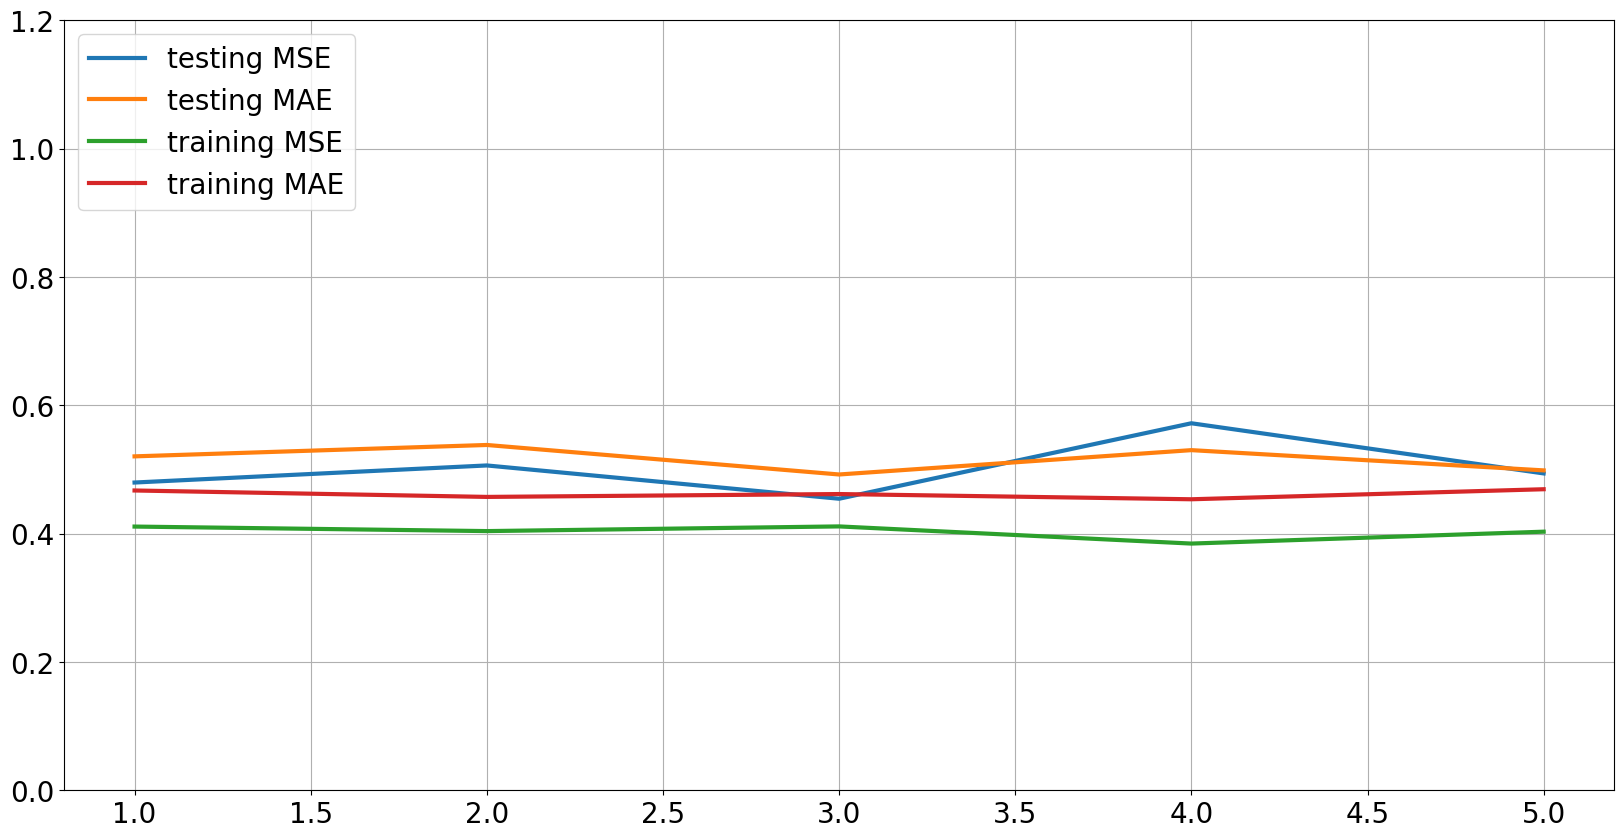

In [13]:
# Draw figure
x_axis=np.linspace(1,5,5)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(x_axis,test_mse,"#1f77b4",linewidth=3,label="testing MSE")
plt.plot(x_axis,test_mae,"#ff7f0e",linewidth=3,label="testing MAE")
plt.plot(x_axis,train_mse,"#2ca02c",linewidth=3,label="training MSE")
plt.plot(x_axis,train_mae,"#d62728",linewidth=3,label="training MAE")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 1.2)  
# Setting the vertical coordinate range
plt.legend(loc="upper left",fontsize=20)
plt.grid()
plt.show()

In [14]:
from sklearn import linear_model

# Defining the model by using Lasso regression
lasso_cv=linear_model.LassoCV(cv=5)

# Initialise the list used to store MSEs and MAEs
train_mse = []
train_mae = []
test_mse = []
test_mae = []

# Define 10-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=999)

# Perform cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = std_X[train_index], std_X[test_index]
    y_train, y_test = std_Y[train_index], std_Y[test_index]
    
    lasso_cv.fit(X_train, y_train)
    model=linear_model.Lasso(alpha = lasso_cv.alpha_)
    
    # Training Models
    model.fit(X_train, y_train)
    
    # Prediction of training and test sets using the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Store to list
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

print("Train MSE scores:", train_mse)
print("Test MSE scores:", test_mse)
print("Train MAE scores:", train_mae)
print("Test MAE scores:", test_mae)

total_train_mae_mean = np.mean(train_mae)
total_train_mse_mean = np.mean(train_mse)
total_test_mae_mean = np.mean(test_mae)
total_test_mse_mean = np.mean(test_mse)

total_train_mae_std = np.std(train_mae)
total_train_mse_std = np.std(train_mse)
total_test_mae_std = np.std(test_mae)
total_test_mse_std = np.std(test_mse)
total_mean_dict = {'total_train_mae_mean':total_train_mae_mean, 'total_train_mse_mean':total_train_mse_mean, 'total_test_mae_mean':total_test_mae_mean, 'total_tset_mse_mean':total_test_mse_mean}
total_std_dict = {'total_train_mae_std':total_train_mae_std, 'total_train_mse_std':total_train_mse_std, 'total_test_mae_std':total_test_mae_std, 'total_tset_mse_std':total_test_mse_std}
print(total_mean_dict,total_std_dict)

Train MSE scores: [0.4132970586461614, 0.4072354959470392, 0.41680850581538537, 0.3885047968665495, 0.407238005971008]
Test MSE scores: [0.468507838934767, 0.49200609823377506, 0.4519271115400548, 0.5725847326052976, 0.4911559590699281]
Train MAE scores: [0.46477894347888987, 0.4537388847955423, 0.4602771951638443, 0.45051747485182553, 0.46738637502703684]
Test MAE scores: [0.5111583504482958, 0.5321320326248666, 0.47990112755813263, 0.5297755335105985, 0.48696173239044177]
{'total_train_mae_mean': 0.45933977466342774, 'total_train_mse_mean': 0.4066167726492287, 'total_test_mae_mean': 0.5079857553064671, 'total_tset_mse_mean': 0.49523634807676453} {'total_train_mae_std': 0.006393966426050565, 'total_train_mse_std': 0.009770466335264185, 'total_test_mae_std': 0.021441354237978192, 'total_tset_mse_std': 0.04147278589151103}


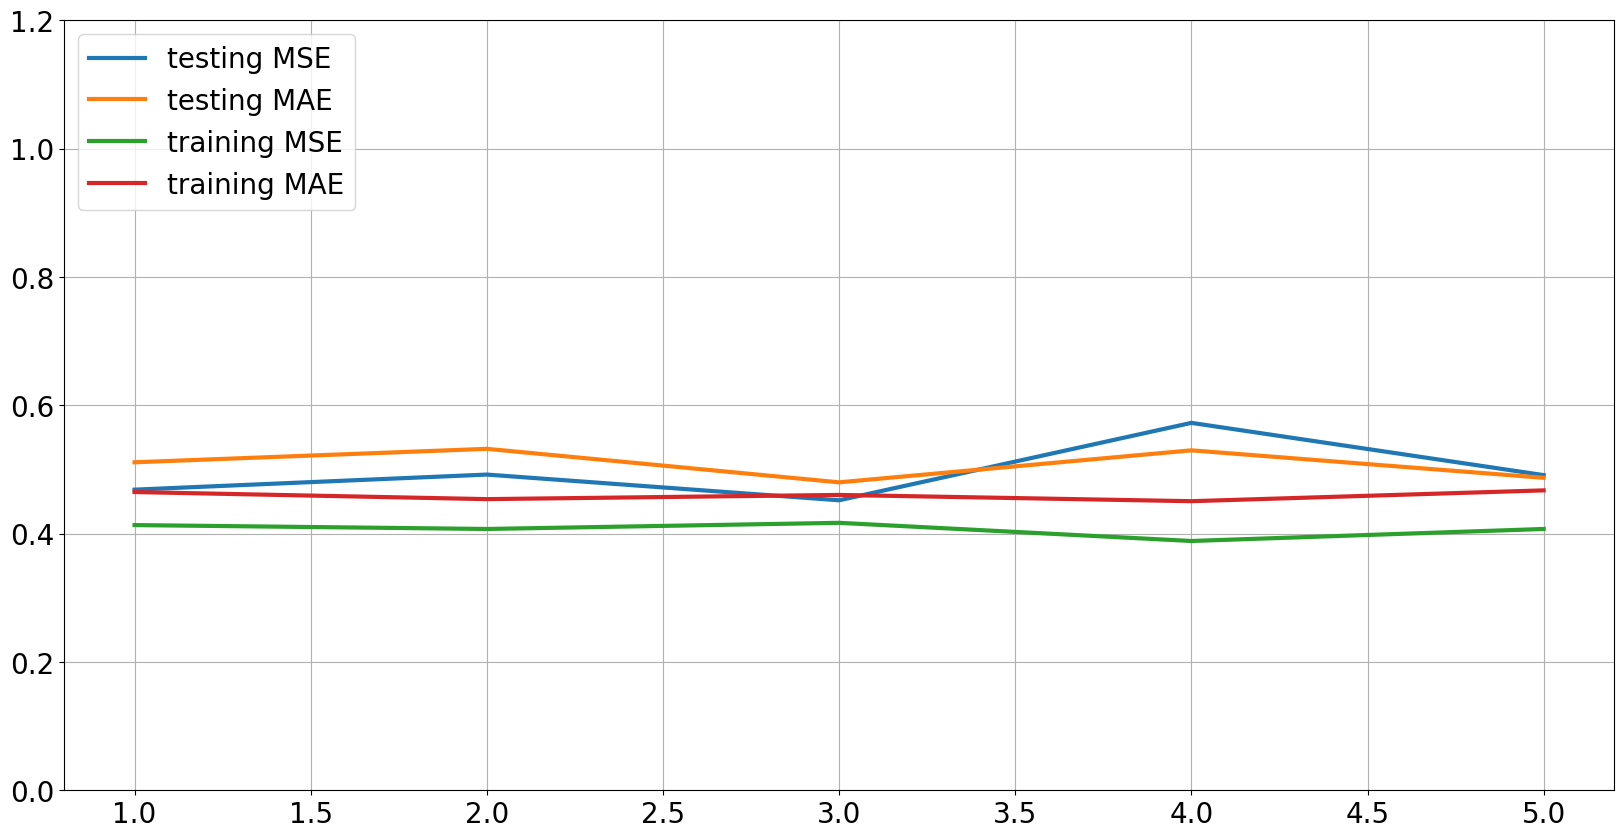

In [15]:
# Draw figure
x_axis=np.linspace(1,5,5)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(x_axis,test_mse,"#1f77b4",linewidth=3,label="testing MSE")
plt.plot(x_axis,test_mae,"#ff7f0e",linewidth=3,label="testing MAE")
plt.plot(x_axis,train_mse,"#2ca02c",linewidth=3,label="training MSE")
plt.plot(x_axis,train_mae,"#d62728",linewidth=3,label="training MAE")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 1.2)
# Setting the vertical coordinate range
plt.legend(loc="upper left",fontsize=20)
plt.grid()
plt.show()

In [16]:
from sklearn.svm import LinearSVR
from sklearn import metrics
from sklearn.svm import SVR

# Defining the model by using Linear SVR
model = LinearSVR(C=2)

# Initialise the list used to store MSEs and MAEs
train_mse = []
train_mae = []
test_mse = []
test_mae = []

# Define 10-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=999)

# Perform cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = std_X[train_index], std_X[test_index]
    y_train, y_test = std_Y[train_index], std_Y[test_index]
    
    # Training Models
    model.fit(X_train, y_train)
    
    # Prediction of training and test sets using the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Store to list
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

print("Train MSE scores:", train_mse)
print("Test MSE scores:", test_mse)
print("Train MAE scores:", train_mae)
print("Test MAE scores:", test_mae)

total_train_mae_mean = np.mean(train_mae)
total_train_mse_mean = np.mean(train_mse)
total_test_mae_mean = np.mean(test_mae)
total_test_mse_mean = np.mean(test_mse)

total_train_mae_std = np.std(train_mae)
total_train_mse_std = np.std(train_mse)
total_test_mae_std = np.std(test_mae)
total_test_mse_std = np.std(test_mse)
total_mean_dict = {'total_train_mae_mean':total_train_mae_mean, 'total_train_mse_mean':total_train_mse_mean, 'total_test_mae_mean':total_test_mae_mean, 'total_tset_mse_mean':total_test_mse_mean}
total_std_dict = {'total_train_mae_std':total_train_mae_std, 'total_train_mse_std':total_train_mse_std, 'total_test_mae_std':total_test_mae_std, 'total_tset_mse_std':total_test_mse_std}
print(total_mean_dict,total_std_dict)

C:\Users\李杰夫\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\李杰夫\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\李杰夫\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\李杰夫\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\李杰夫\AppData\Local\Programs\Python\Python311\Lib\site-packages\skl

Train MSE scores: [0.4575801642067683, 0.4463726690549284, 0.45155527697891246, 0.43042062601163933, 0.4443673773784074]
Test MSE scores: [0.4883731311202142, 0.5139347622703564, 0.4957610494103013, 0.6759719502696806, 0.4861579588839688]
Train MAE scores: [0.44929613117742645, 0.43802646676652673, 0.44575790768595436, 0.43367411132421535, 0.45488301873679277]
Test MAE scores: [0.5055835982463781, 0.5287201226199363, 0.49317312579201755, 0.563694388062476, 0.4682492956602129]
{'total_train_mae_mean': 0.44432752713818313, 'total_train_mse_mean': 0.44605922272613113, 'total_test_mae_mean': 0.5118841060762042, 'total_tset_mse_mean': 0.5320397703909042} {'total_train_mae_std': 0.007633479518687442, 'total_train_mse_std': 0.009060518764728057, 'total_test_mae_std': 0.03243932993976984, 'total_tset_mse_std': 0.07262551250358858}


C:\Users\李杰夫\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\李杰夫\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\李杰夫\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


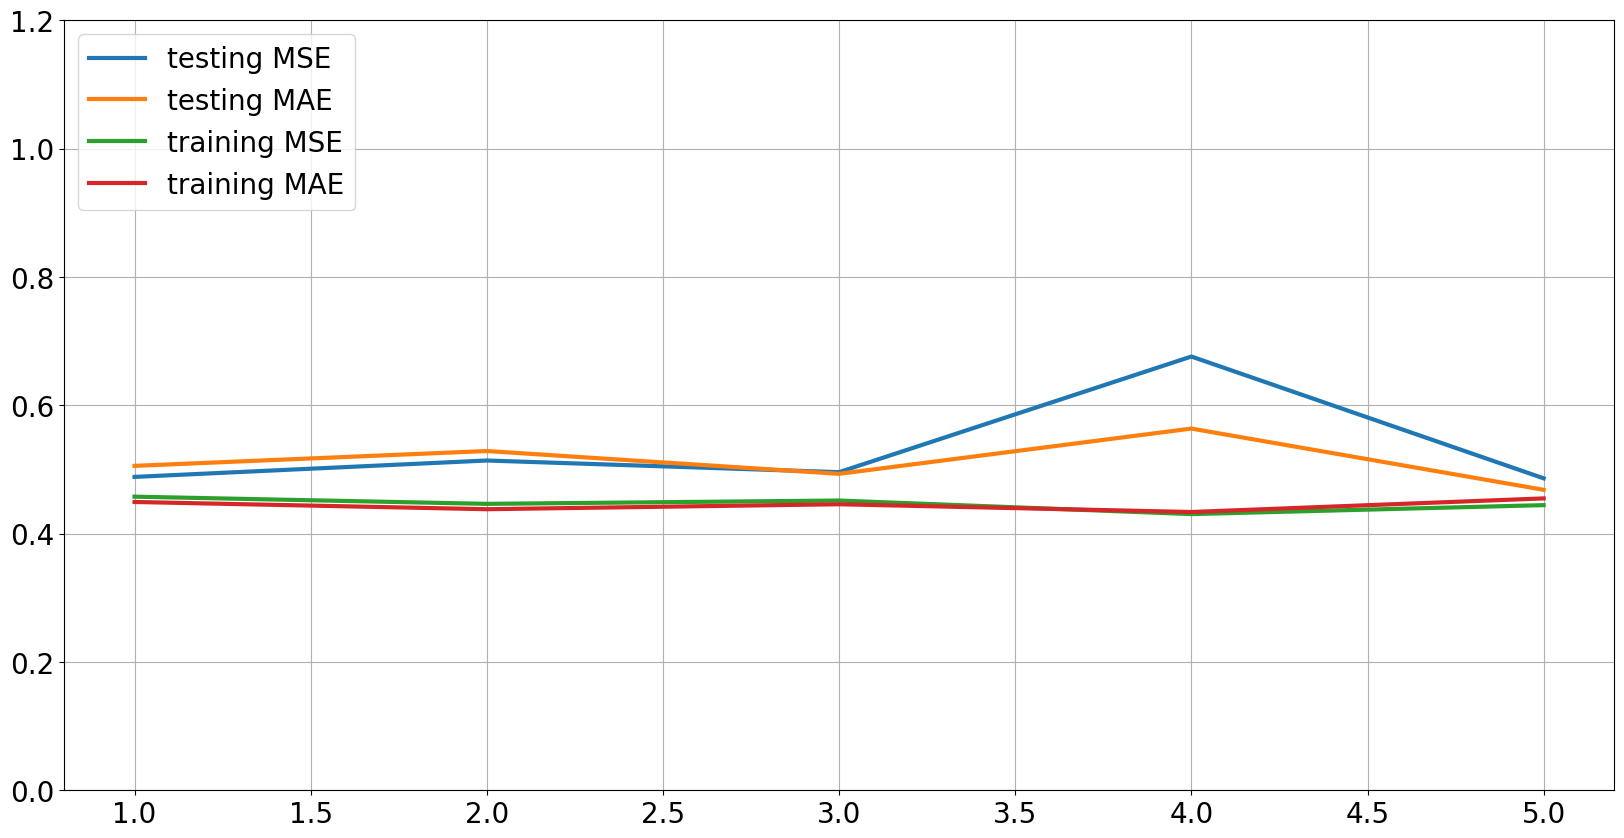

In [17]:
# Draw figure
x_axis=np.linspace(1,5,5)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(x_axis,test_mse,"#1f77b4",linewidth=3,label="testing MSE")
plt.plot(x_axis,test_mae,"#ff7f0e",linewidth=3,label="testing MAE")
plt.plot(x_axis,train_mse,"#2ca02c",linewidth=3,label="training MSE")
plt.plot(x_axis,train_mae,"#d62728",linewidth=3,label="training MAE")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 1.2)  
# Setting the vertical coordinate range
plt.legend(loc="upper left",fontsize=20)
plt.grid()
plt.show()

In [18]:
# Defining the model by using Kernel SVR
model = SVR(kernel='rbf',C=10,gamma=0.1,coef0=0.1)

# Initialise the list used to store MSEs and MAEs
train_mse = []
train_mae = []
test_mse = []
test_mae = []

# Define 10-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=999)

# Perform cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = std_X[train_index], std_X[test_index]
    y_train, y_test = std_Y[train_index], std_Y[test_index]
    
    # Training Models
    model.fit(X_train, y_train)
    
    # Prediction of training and test sets using the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Store to list
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

print("Train MSE scores:", train_mse)
print("Test MSE scores:", test_mse)
print("Train MAE scores:", train_mae)
print("Test MAE scores:", test_mae)

total_train_mae_mean = np.mean(train_mae)
total_train_mse_mean = np.mean(train_mse)
total_test_mae_mean = np.mean(test_mae)
total_test_mse_mean = np.mean(test_mse)

total_train_mae_std = np.std(train_mae)
total_train_mse_std = np.std(train_mse)
total_test_mae_std = np.std(test_mae)
total_test_mse_std = np.std(test_mse)
total_mean_dict = {'total_train_mae_mean':total_train_mae_mean, 'total_train_mse_mean':total_train_mse_mean, 'total_test_mae_mean':total_test_mae_mean, 'total_tset_mse_mean':total_test_mse_mean}
total_std_dict = {'total_train_mae_std':total_train_mae_std, 'total_train_mse_std':total_train_mse_std, 'total_test_mae_std':total_test_mae_std, 'total_tset_mse_std':total_test_mse_std}
print(total_mean_dict,total_std_dict)

Train MSE scores: [0.009434924131549265, 0.009424250403348582, 0.009465567573430273, 0.00946983615321194, 0.009488428710376511]
Test MSE scores: [0.8671085396934026, 1.0228758044825161, 0.8594086979117914, 1.1557545201909722, 0.9650022694648062]
Train MAE scores: [0.09582177546766814, 0.09576639520405102, 0.09613870546929153, 0.09615826465822003, 0.0962047384852746]
Test MAE scores: [0.7210052291172451, 0.7542865568529585, 0.7069271887114682, 0.7813838078385535, 0.6914446535517823]
{'total_train_mae_mean': 0.09601797585690106, 'total_train_mse_mean': 0.009456601394383316, 'total_test_mae_mean': 0.7310094872144015, 'total_tset_mse_mean': 0.9740299663486978} {'total_train_mae_std': 0.0001848914730668026, 'total_train_mse_std': 2.3600930473990115e-05, 'total_test_mae_std': 0.032633763170412125, 'total_tset_mse_std': 0.10960059793567307}


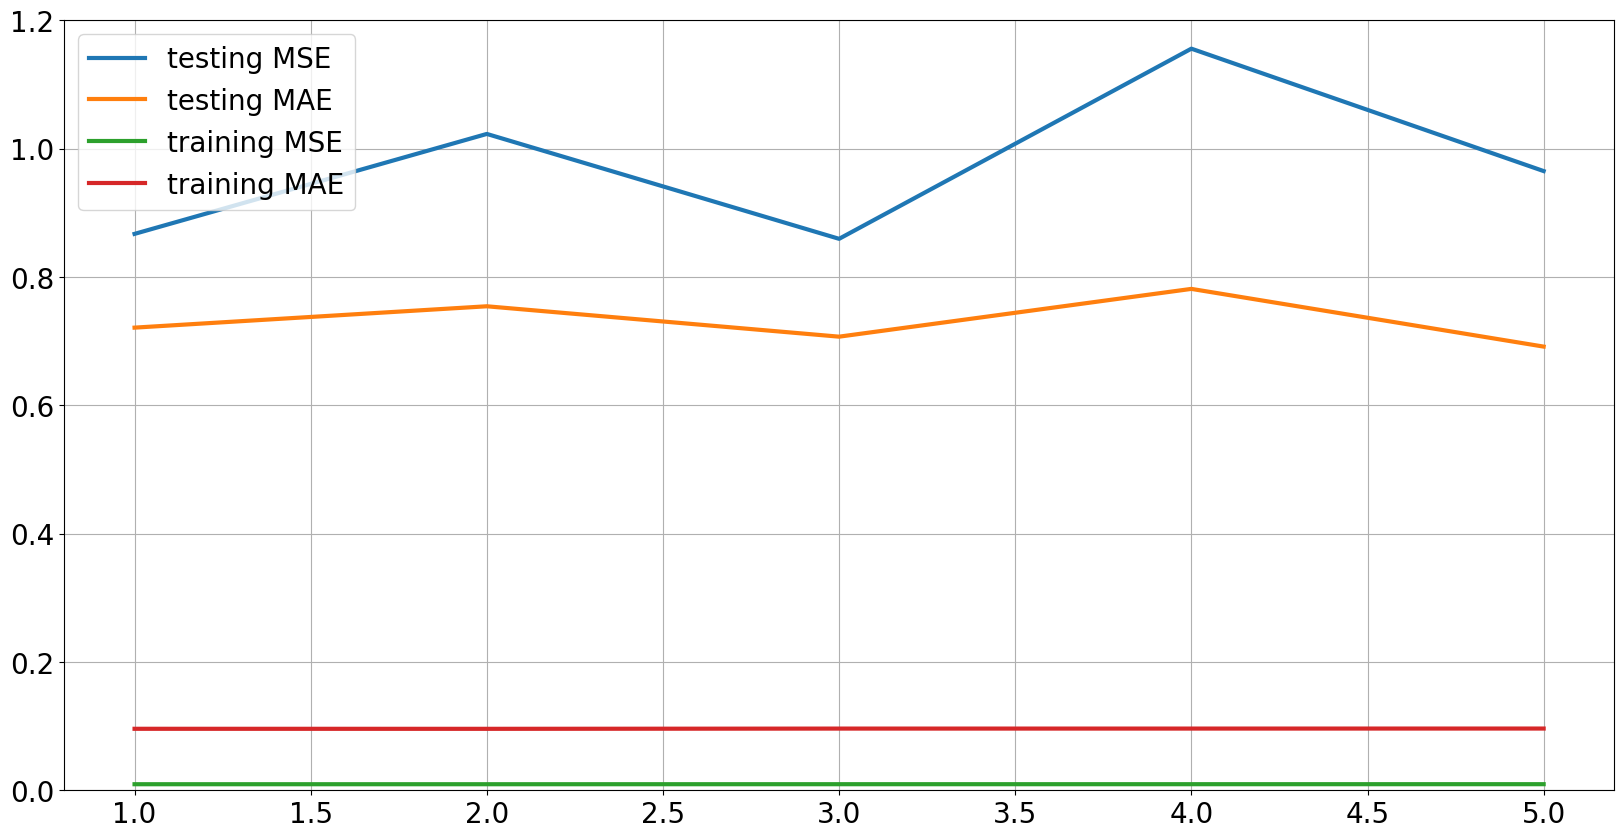

In [19]:
# Draw figure
x_axis=np.linspace(1,5,5)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(x_axis,test_mse,"#1f77b4",linewidth=3,label="testing MSE")
plt.plot(x_axis,test_mae,"#ff7f0e",linewidth=3,label="testing MAE")
plt.plot(x_axis,train_mse,"#2ca02c",linewidth=3,label="training MSE")
plt.plot(x_axis,train_mae,"#d62728",linewidth=3,label="training MAE")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 1.2)  
# Setting the vertical coordinate range
plt.legend(loc="upper left",fontsize=20)
plt.grid()
plt.show()

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Defining the model by using Gradient Boosting Regressor 
model = GradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.1,
    n_estimators=500,
    min_samples_split=2,
    verbose=1)

# Initialise the list used to store MSEs and MAEs
train_mse = []
train_mae = []
test_mse = []
test_mae = []

# Define 10-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=999)

# Perform cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = std_X[train_index], std_X[test_index]
    y_train, y_test = std_Y[train_index], std_Y[test_index]
    
    # Training Models
    model.fit(X_train, y_train)
    
    # Prediction of training and test sets using the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Store to list
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

print("Train MSE scores:", train_mse)
print("Test MSE scores:", test_mse)
print("Train MAE scores:", train_mae)
print("Test MAE scores:", test_mae)

total_train_mae_mean = np.mean(train_mae)
total_train_mse_mean = np.mean(train_mse)
total_test_mae_mean = np.mean(test_mae)
total_test_mse_mean = np.mean(test_mse)

total_train_mae_std = np.std(train_mae)
total_train_mse_std = np.std(train_mse)
total_test_mae_std = np.std(test_mae)
total_test_mse_std = np.std(test_mse)
total_mean_dict = {'total_train_mae_mean':total_train_mae_mean, 'total_train_mse_mean':total_train_mse_mean, 'total_test_mae_mean':total_test_mae_mean, 'total_tset_mse_mean':total_test_mse_mean}
total_std_dict = {'total_train_mae_std':total_train_mae_std, 'total_train_mse_std':total_train_mse_std, 'total_test_mae_std':total_test_mae_std, 'total_tset_mse_std':total_test_mse_std}
print(total_mean_dict,total_std_dict)

      Iter       Train Loss   Remaining Time 
         1           0.9548            2.29s
         2           0.8946            1.89s
         3           0.8381            1.75s
         4           0.7946            1.56s
         5           0.7542            1.56s
         6           0.7151            1.54s
         7           0.6850            1.53s
         8           0.6517            1.52s
         9           0.6229            1.52s
        10           0.5947            1.52s
        20           0.4314            1.44s
        30           0.3418            1.40s
        40           0.2848            1.37s
        50           0.2400            1.33s
        60           0.2103            1.30s
        70           0.1853            1.27s
        80           0.1673            1.25s
        90           0.1537            1.21s
       100           0.1415            1.18s
       200           0.0821            0.87s
       300           0.0492            0.58s
       40

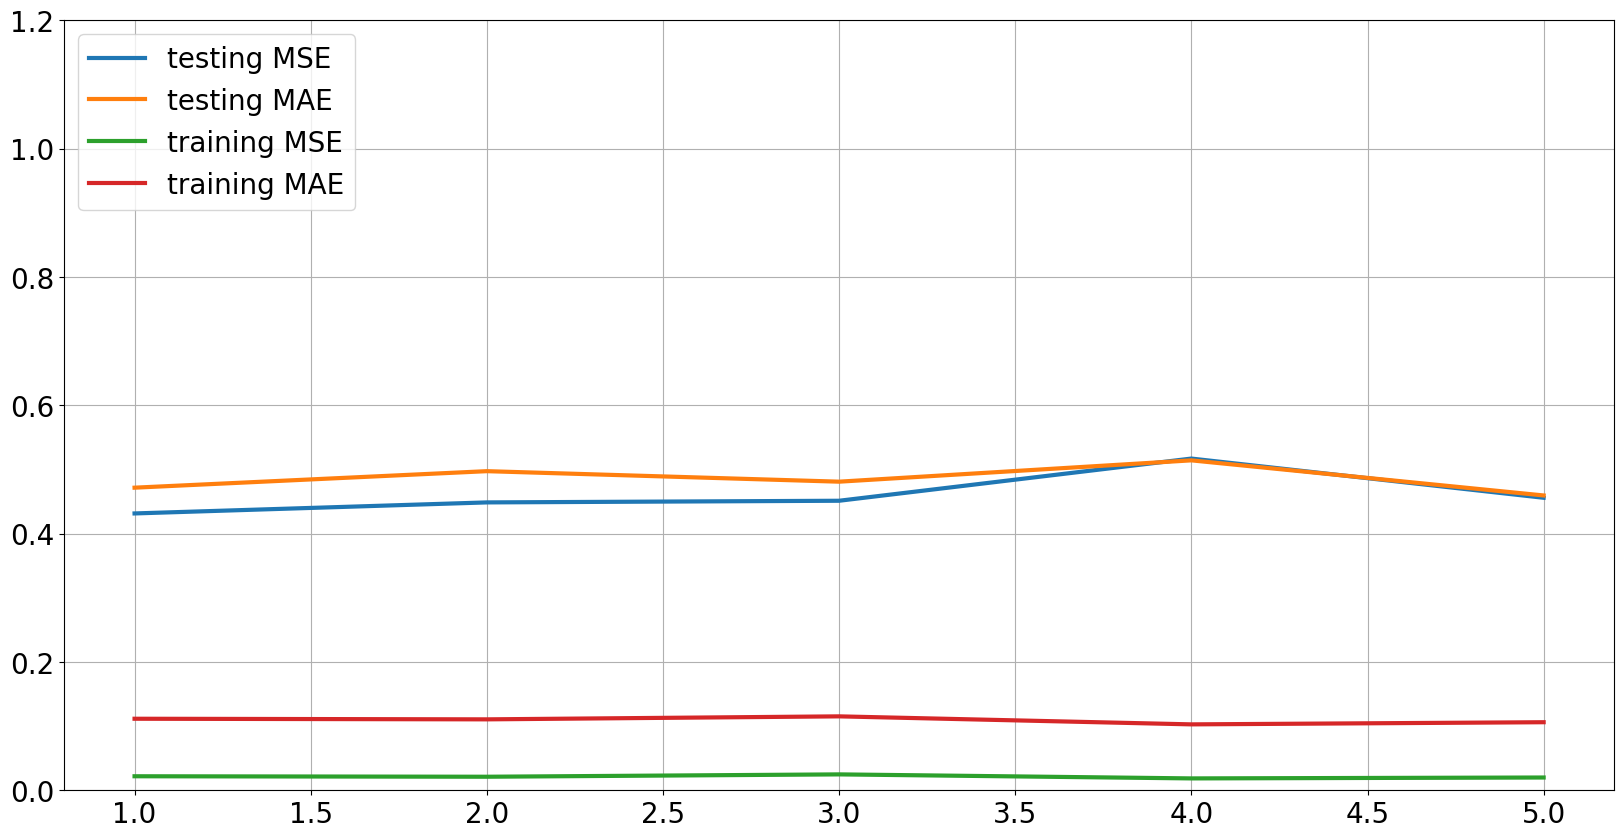

In [21]:
# Draw figure
x_axis=np.linspace(1,5,5)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(x_axis,test_mse,"#1f77b4",linewidth=3,label="testing MSE")
plt.plot(x_axis,test_mae,"#ff7f0e",linewidth=3,label="testing MAE")
plt.plot(x_axis,train_mse,"#2ca02c",linewidth=3,label="training MSE")
plt.plot(x_axis,train_mae,"#d62728",linewidth=3,label="training MAE")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 1.2)  
# Setting the vertical coordinate range
plt.legend(loc="upper left",fontsize=20)
plt.grid()
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Defining the model by using Random Forest
model = RandomForestRegressor(n_estimators=200,random_state=42)

# Initialise the list used to store MSEs and MAEs
train_mse = []
train_mae = []
test_mse = []
test_mae = []

# Initialise an array to store the feature importance scores for each validation
feature_importance_scores = []

# Define 10-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=999)

# Perform cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = std_X[train_index], std_X[test_index]
    y_train, y_test = std_Y[train_index], std_Y[test_index]
    
    # Training Models
    model.fit(X_train, y_train)
    
    # Prediction of training and test sets using the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Store to list
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

    # Get feature importance score and store
    feature_importance_scores.append(model.feature_importances_)

print("Train MSE scores:", train_mse)
print("Test MSE scores:", test_mse)
print("Train MAE scores:", train_mae)
print("Test MAE scores:", test_mae)

total_train_mae_mean = np.mean(train_mae)
total_train_mse_mean = np.mean(train_mse)
total_test_mae_mean = np.mean(test_mae)
total_test_mse_mean = np.mean(test_mse)

total_train_mae_std = np.std(train_mae)
total_train_mse_std = np.std(train_mse)
total_test_mae_std = np.std(test_mae)
total_test_mse_std = np.std(test_mse)
total_mean_dict = {'total_train_mae_mean':total_train_mae_mean, 'total_train_mse_mean':total_train_mse_mean, 'total_test_mae_mean':total_test_mae_mean, 'total_tset_mse_mean':total_test_mse_mean}
total_std_dict = {'total_train_mae_std':total_train_mae_std, 'total_train_mse_std':total_train_mse_std, 'total_test_mae_std':total_test_mae_std, 'total_tset_mse_std':total_test_mse_std}
print(total_mean_dict,total_std_dict)

Train MSE scores: [0.07025975625050937, 0.06696138237069296, 0.07275555942869173, 0.06437651137082927, 0.06604410511748203]
Test MSE scores: [0.4035110707249816, 0.4950921003322016, 0.4312039776598741, 0.6217511256446568, 0.5177281666448929]
Train MAE scores: [0.18414748020853816, 0.18138349511333648, 0.1866985670304328, 0.17991602792354142, 0.18383062537589057]
Test MAE scores: [0.4613704471184488, 0.5106412862522396, 0.4790915178111123, 0.5688226899543896, 0.46875000500661723]
{'total_train_mae_mean': 0.18319523913034788, 'total_train_mse_mean': 0.06807946290764108, 'total_test_mae_mean': 0.49773518922856147, 'total_tset_mse_mean': 0.4938572882013214} {'total_train_mae_std': 0.002350294775110261, 'total_train_mse_std': 0.0030240434269427443, 'total_test_mae_std': 0.03931951667268065, 'total_tset_mse_std': 0.07617880753691772}


In [23]:
# Output the feature importance score for each validation
for i, score in enumerate(feature_importance_scores):
    print(f"Feature importance score for {i+1}th validation:")
    indices = np.argsort(score)[::-1]
    for f in range(X.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30, feature[indices[f]], score[indices[f]]))

Feature importance score for 1th validation:
 1) HDD65                          0.320899
 2) HDD30YR                        0.058221
 3) AGECENAC                       0.055263
 4) GNDHDD65                       0.042433
 5) TEMPNITEAC                     0.034331
 6) CDD65                          0.032179
 7) TEMPGONEAC                     0.028025
 8) TEMPHOMEAC                     0.027092
 9) AGEFRZR                        0.025635
10) DRYRUSE                        0.020883
11) TEMPHOME                       0.019093
12) AGECWASH                       0.017411
13) WASHLOAD                       0.017189
14) CDD80                          0.017063
15) OVENUSE                        0.016933
16) AGERFRI1                       0.014734
17) INTDATAACC                     0.014134
18) GWT                            0.011714
19) TYPERFR2                       0.010800
20) TOTSQFT_EN                     0.010106
21) WINDOWS                        0.009549
22) HDD50                      

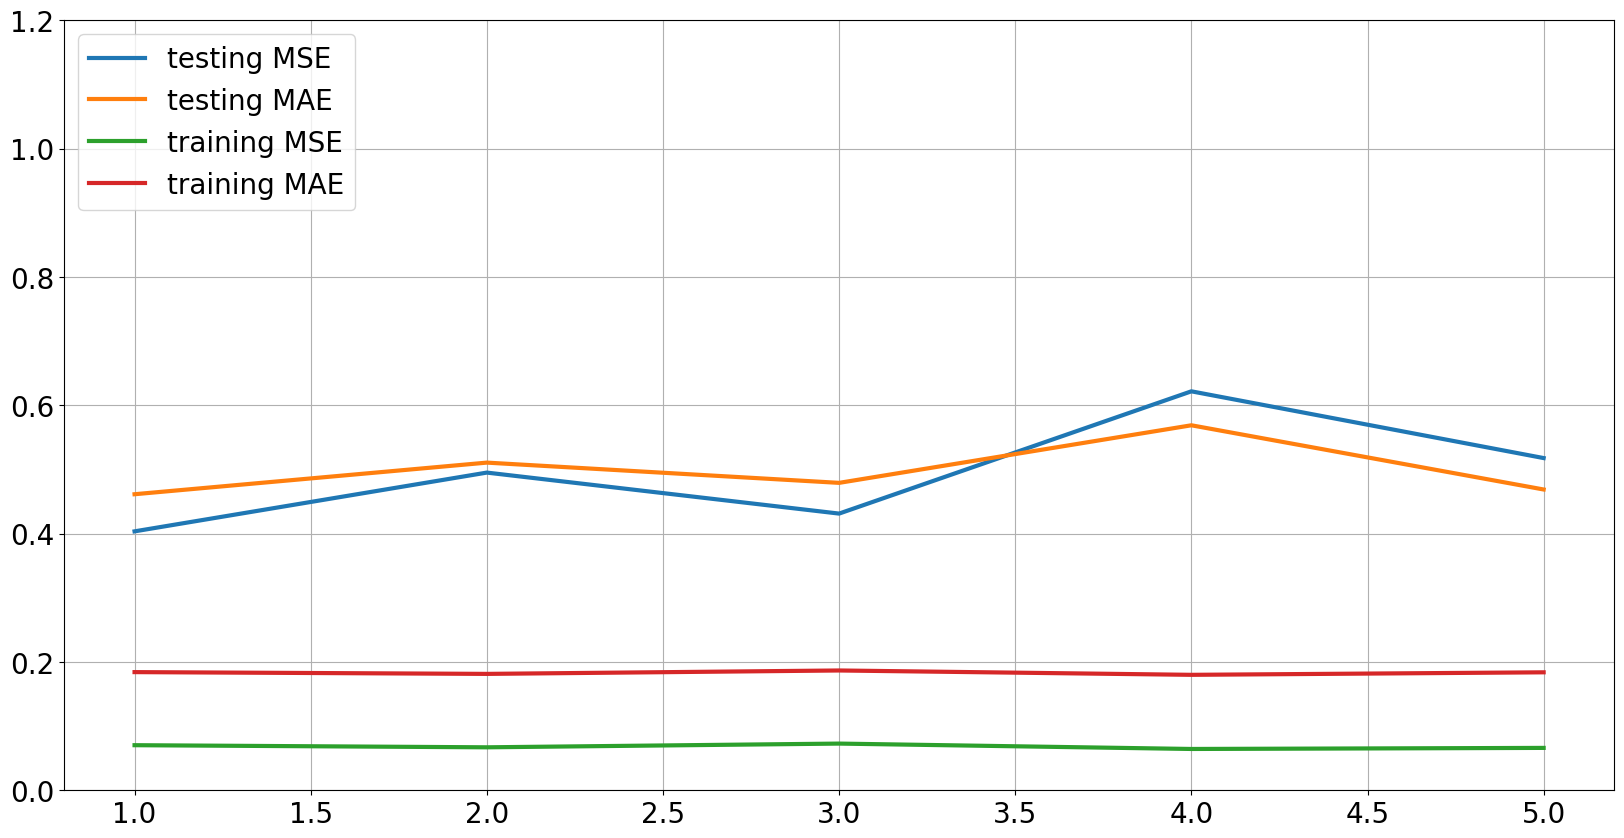

In [24]:
# Draw figure
x_axis=np.linspace(1,5,5)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(x_axis,test_mse,"#1f77b4",linewidth=3,label="testing MSE")
plt.plot(x_axis,test_mae,"#ff7f0e",linewidth=3,label="testing MAE")
plt.plot(x_axis,train_mse,"#2ca02c",linewidth=3,label="training MSE")
plt.plot(x_axis,train_mae,"#d62728",linewidth=3,label="training MAE")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 1.2)  
# Setting the vertical coordinate range
plt.legend(loc="upper left",fontsize=20)
plt.grid()
plt.show()

In [25]:
TargetVariable=['EUI']
y=data[TargetVariable].values
X = data.iloc[:,1:].values
Predictors = X
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(789, 70)
(789, 1)
(198, 70)
(198, 1)


In [26]:
# Function to generate Deep ANN model 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,mean_absolute_error

model = Sequential()
model.add(Dense(units=5, input_dim=70, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

def make_regression_ann(optimizer_trial='adam'):
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    model.add(Dense(units=5, input_dim=70, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=optimizer_trial)
    return model



###########################################
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import  KerasRegressor

# Listing all the parameters to try
parameter_trials = {
    'batch_size': [10, 20, 30],
    'epochs': [10, 20],
    'optimizer_trial': ['adam', 'rmsprop']  # Use the optimizer_trial parameter here
}

# Creating the regression ANN model with the default optimizer_trial
reg_model = KerasRegressor(make_regression_ann, optimizer_trial='adam', verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    from sklearn.metrics import mean_absolute_percentage_error
    MAPE =mean_absolute_percentage_error(y_test, model.predict(X_test))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
grid_search = GridSearchCV(estimator=reg_model, 
                           param_grid=parameter_trials, 
                           scoring=custom_Scoring, 
                           cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime = time.time()

# Running Grid Search for different parameters
grid_search.fit(X, y, verbose=1)

EndTime = time.time()
print("########## Total Time Taken: ", round((EndTime - StartTime) / 60), 'Minutes')

best_params = grid_search.best_params_


# Creating the regression ANN model with the best parameters
best_model = KerasRegressor(make_regression_ann, **best_params, verbose=0)
best_model.fit(X, y)  # Fit the model on the entire dataset

# Evaluate the best model
test_predictions = best_model.predict(X)
test_mse = mean_squared_error(y,test_predictions)
test_mae = mean_absolute_error(y,test_predictions)
accuracy = Accuracy_Score(y,test_predictions)


print('### Best Model Performance ###')
best_params = grid_search.best_params_
print(best_params)
print('MSE',test_mse)
print("MAE",test_mae)
print('Accuracy:', accuracy)




Epoch 1/10

79/79 [==============================] - 1s 1ms/step - loss: 0.9950
Epoch 2/10
79/79 [==============================] - 0s 850us/step - loss: 0.9933
Epoch 3/10
79/79 [==============================] - 0s 834us/step - loss: 0.9430
Epoch 4/10
79/79 [==============================] - 0s 869us/step - loss: 0.8296
Epoch 5/10
79/79 [==============================] - 0s 896us/step - loss: 0.7690
Epoch 6/10
79/79 [==============================] - 0s 862us/step - loss: 0.7220
Epoch 7/10
79/79 [==============================] - 0s 874us/step - loss: 0.6842
Epoch 8/10
79/79 [==============================] - 0s 849us/step - loss: 0.6520
Epoch 9/10
79/79 [==============================] - 0s 862us/step - loss: 0.6245
Epoch 10/10
7/7 [==============================] - 0s 1ms/step
###################################################################### Accuracy: 98.99999994254514
Epoch 1/10
79/79 [==============================] - 1s 813us/step - loss: 0.9947
Epoch 2/10
79/79 [========

In [27]:
#creat lists to contain the later accessed mae & mse
test_mean_mae_list = []
train_mean_mae_list = []
test_mean_mse_list = []
train_mean_mse_list  = []
test_mean_mae_list.clear()
test_mean_mse_list.clear()
train_mean_mae_list.clear()
train_mean_mse_list.clear()

In [28]:
#record the mae and mse of every set for later use
test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_predictions)
test_mae = mean_absolute_error(y_test,test_predictions)
train_predictions = best_model.predict(X_train)
train_mae = mean_absolute_error(y_train,train_predictions)
train_mse = mean_squared_error(y_train,train_predictions)
test_mean_mae_list.append(test_mae)
test_mean_mse_list.append(test_mse)
train_mean_mae_list.append(train_mae)
train_mean_mse_list.append(train_mse)

In [29]:
#calculate the mae and mse in each epochs when the model is at best parameters(epoch = 10 and batch_size = 10), then calculate the mean of mae and mse
# Define lists to store MAE and MSE
test_mae_list = []
test_mse_list = []
train_mae_list = []
train_mse_list = []

epochs = best_params['epochs']
batch_size = best_params['batch_size']

# Fit the model and store MAE and MSE for each epoch
for epoch in range(epochs):
    history = reg_model.fit(X_train, y_train, batch_size=batch_size, epochs=1, verbose=0)
    y_pred = reg_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    test_mse_list.append(mse)
    test_mae_list.append(mae)
    print(f"Epoch {epoch+1}: MSE={mse:.4f}, MAE={mae:.4f}")

for epoch in range(epochs):
    history = reg_model.fit(X_train, y_train, batch_size=batch_size, epochs=1, verbose=0)
    y_pred = reg_model.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    train_mse_list.append(mse)
    train_mae_list.append(mae)
    print(f"Epoch {epoch+1}: MSE={mse:.4f}, MAE={mae:.4f}")

# Print the lists of MAE and MSE
print("MAE List:", test_mae_list)
print("MSE List:", test_mse_list)
test_mean_mae = np.mean(test_mae_list)
train_mean_mae = np.mean(train_mae_list)
test_mean_mse = np.mean(test_mse_list)
train_mean_mse = np.mean(train_mse_list)
test_std_mae = np.std(test_mae_list)
test_std_mse = np.std(test_mse_list)
var_mae = np.var(test_mae_list)
var_mse = np.var(test_mse_list)

#print the mean and standard deviation of each epochs' mae and mse
print("At best paramters:")
print("epoch =", epochs, "batch size =", batch_size)
print("The mean of MAE is:", test_mean_mae, "The standard deviation of MAE is:", test_std_mae)
print("The mean of MSE is:", test_mean_mse, "The standard deviation of MSE is:", test_std_mse)

Epoch 1: MSE=1.0374, MAE=0.7749
Epoch 2: MSE=1.0376, MAE=0.7742
Epoch 3: MSE=1.0375, MAE=0.7745
Epoch 4: MSE=1.0377, MAE=0.7735
Epoch 5: MSE=1.0376, MAE=0.7740
Epoch 6: MSE=1.0375, MAE=0.7746
Epoch 7: MSE=1.0376, MAE=0.7740
Epoch 8: MSE=1.0374, MAE=0.7750
Epoch 9: MSE=1.0376, MAE=0.7739
Epoch 10: MSE=1.0374, MAE=0.7749
Epoch 1: MSE=0.9906, MAE=0.7311
Epoch 2: MSE=0.9906, MAE=0.7302
Epoch 3: MSE=0.9906, MAE=0.7313
Epoch 4: MSE=0.9906, MAE=0.7286
Epoch 5: MSE=0.9906, MAE=0.7315
Epoch 6: MSE=0.9906, MAE=0.7305
Epoch 7: MSE=0.9906, MAE=0.7294
Epoch 8: MSE=0.9906, MAE=0.7302
Epoch 9: MSE=0.9906, MAE=0.7303
Epoch 10: MSE=0.9906, MAE=0.7303
MAE List: [0.7748650186689693, 0.7741958767657036, 0.7745221306380966, 0.7735374948452061, 0.7739901754945563, 0.7746093820121243, 0.773972823884911, 0.774950429593193, 0.7739327503327514, 0.7748850843419188]
MSE List: [1.0374423915233493, 1.0375693533225365, 1.0375044133062306, 1.0377222325400262, 1.0376132684574877, 1.037488025665891, 1.0376167777257466,

In [30]:
# show the mae and mse in every epochs and batch_sizes (show the overall performances of every possible situations of the model)
# Define lists to store MAE and MSE
train_mae_list = []
train_mse_list = []
epochs_list = parameter_trials['epochs']
batch_size_list = parameter_trials['batch_size']

# Fit the model and store MAE and MSE for each epoch
for i in epochs_list:
    for batch_size in batch_size_list: 
        for epoch in range(i):
               
                history = reg_model.fit(X_train, y_train, batch_size=batch_size, epochs=1, verbose=0)
                y_pred_train = reg_model.predict(X_train)
                mse = mean_squared_error(y_train, y_pred_train)
                mae = mean_absolute_error(y_train, y_pred_train)
                train_mse_list.append(mse)
                train_mae_list.append(mae)
                print(f"Epoch {epoch+1}: MSE={mse:.4f}, MAE={mae:.4f}")

        with open('trian_mae_mse_results1.txt', 'a') as file:
            file.write(f"Epochs: {i}, Batch Size: {batch_size}\n")
            file.write("MAE List:\n")
            file.write(str(train_mae_list) + '\n')
            file.write("MSE List:\n")
            file.write(str(train_mse_list) + '\n')
            file.write(f"The mean of MAE is: {np.mean(train_mae_list):.4f}, The standard deviation of MAE is: {np.std(train_mae_list):.4f}\n")
            file.write(f"The mean of MSE is: {np.mean(train_mse_list):.4f}, The standard deviation of MSE is: {np.std(train_mse_list):.4f}\n\n")

        # Clear the lists for the next iteration
        train_mae_list.clear()
        train_mse_list.clear()


Epoch 1: MSE=0.9906, MAE=0.7297
Epoch 2: MSE=0.9906, MAE=0.7310
Epoch 3: MSE=0.9906, MAE=0.7299
Epoch 4: MSE=0.9906, MAE=0.7314
Epoch 5: MSE=0.9906, MAE=0.7313
Epoch 6: MSE=0.9906, MAE=0.7300
Epoch 7: MSE=0.9906, MAE=0.7312
Epoch 8: MSE=0.9905, MAE=0.7297
Epoch 9: MSE=0.9906, MAE=0.7301
Epoch 10: MSE=0.9906, MAE=0.7303
Epoch 1: MSE=0.9906, MAE=0.7299
Epoch 2: MSE=0.9906, MAE=0.7315
Epoch 3: MSE=0.9906, MAE=0.7316
Epoch 4: MSE=0.9906, MAE=0.7304
Epoch 5: MSE=0.9906, MAE=0.7303
Epoch 6: MSE=0.9906, MAE=0.7316
Epoch 7: MSE=0.9906, MAE=0.7312
Epoch 8: MSE=0.9906, MAE=0.7309
Epoch 9: MSE=0.9906, MAE=0.7297
Epoch 10: MSE=0.9906, MAE=0.7306
Epoch 1: MSE=0.9906, MAE=0.7303
Epoch 2: MSE=0.9906, MAE=0.7310
Epoch 3: MSE=0.9906, MAE=0.7312
Epoch 4: MSE=0.9906, MAE=0.7314
Epoch 5: MSE=0.9906, MAE=0.7300
Epoch 6: MSE=0.9906, MAE=0.7319
Epoch 7: MSE=0.9906, MAE=0.7306
Epoch 8: MSE=0.9906, MAE=0.7312
Epoch 9: MSE=0.9906, MAE=0.7306
Epoch 10: MSE=0.9906, MAE=0.7311
Epoch 1: MSE=0.9906, MAE=0.7308
Epoch

In [31]:
# show the mae and mse in every epochs and batch_sizes (show the overall performances of every possible situations of the model)
# Define lists to store MAE and MSE
test_mae_list = []
test_mse_list = []
epochs_list = parameter_trials['epochs']
batch_size_list = parameter_trials['batch_size']

# Fit the model and store MAE and MSE for each epoch
for i in epochs_list:
    for batch_size in batch_size_list: 
        for epoch in range(i):
               
                history = reg_model.fit(X_train, y_train, batch_size=batch_size, epochs=1, verbose=0)
                y_pred = reg_model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                mae = mean_absolute_error(y_test, y_pred)
                test_mse_list.append(mse)
                test_mae_list.append(mae)
                print(f"Epoch {epoch+1}: MSE={mse:.4f}, MAE={mae:.4f}")

        with open('test_mae_mse_results1.txt', 'a') as file:
            file.write(f"Epochs: {i}, Batch Size: {batch_size}\n")
            file.write("MAE List:\n")
            file.write(str(test_mae_list) + '\n')
            file.write("MSE List:\n")
            file.write(str(test_mse_list) + '\n')
            file.write(f"The mean of MAE is: {np.mean(test_mae_list):.4f}, The standard deviation of MAE is: {np.std(test_mae_list):.4f}\n")
            file.write(f"The mean of MSE is: {np.mean(test_mse_list):.4f}, The standard deviation of MSE is: {np.std(test_mse_list):.4f}\n\n")

        # Clear the lists for the next iteration
        test_mae_list.clear()
        test_mse_list.clear()


Epoch 1: MSE=1.0375, MAE=0.7745
Epoch 2: MSE=1.0374, MAE=0.7749
Epoch 3: MSE=1.0375, MAE=0.7746
Epoch 4: MSE=1.0376, MAE=0.7738
Epoch 5: MSE=1.0374, MAE=0.7751
Epoch 6: MSE=1.0374, MAE=0.7749
Epoch 7: MSE=1.0377, MAE=0.7736
Epoch 8: MSE=1.0374, MAE=0.7753
Epoch 9: MSE=1.0375, MAE=0.7746
Epoch 10: MSE=1.0378, MAE=0.7732
Epoch 1: MSE=1.0377, MAE=0.7737
Epoch 2: MSE=1.0376, MAE=0.7742
Epoch 3: MSE=1.0376, MAE=0.7738
Epoch 4: MSE=1.0376, MAE=0.7741
Epoch 5: MSE=1.0377, MAE=0.7737
Epoch 6: MSE=1.0374, MAE=0.7753
Epoch 7: MSE=1.0377, MAE=0.7736
Epoch 8: MSE=1.0374, MAE=0.7754
Epoch 9: MSE=1.0374, MAE=0.7749
Epoch 10: MSE=1.0376, MAE=0.7739
Epoch 1: MSE=1.0374, MAE=0.7753
Epoch 2: MSE=1.0375, MAE=0.7744
Epoch 3: MSE=1.0375, MAE=0.7747
Epoch 4: MSE=1.0375, MAE=0.7747
Epoch 5: MSE=1.0375, MAE=0.7748
Epoch 6: MSE=1.0375, MAE=0.7748
Epoch 7: MSE=1.0375, MAE=0.7743
Epoch 8: MSE=1.0375, MAE=0.7743
Epoch 9: MSE=1.0374, MAE=0.7749
Epoch 10: MSE=1.0375, MAE=0.7744
Epoch 1: MSE=1.0377, MAE=0.7738
Epoch

In [32]:
#try the achieve cross-validation by changing the random state number of the sets to saperate it into 5 equal parts
TargetVariable=['EUI']
y=data[TargetVariable].values
X = data.iloc[:,1:].values
Predictors = X
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=209)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Function to generate Deep ANN model 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,mean_absolute_error

model = Sequential()
model.add(Dense(units=5, input_dim=70, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

def make_regression_ann(optimizer_trial='adam'):
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    model.add(Dense(units=5, input_dim=70, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=optimizer_trial)
    return model



###########################################
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import  KerasRegressor

# Listing all the parameters to try
parameter_trials = {
    'batch_size': [10, 20, 30],
    'epochs': [10, 20],
    'optimizer_trial': ['adam', 'rmsprop']  # Use the optimizer_trial parameter here
}

# Creating the regression ANN model with the default optimizer_trial
reg_model = KerasRegressor(make_regression_ann, optimizer_trial='adam', verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    from sklearn.metrics import mean_absolute_percentage_error
    MAPE =mean_absolute_percentage_error(y_test, model.predict(X_test))
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
grid_search = GridSearchCV(estimator=reg_model, 
                           param_grid=parameter_trials, 
                           scoring=custom_Scoring, 
                           cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime = time.time()

# Running Grid Search for different parameters
grid_search.fit(X, y, verbose=1)

EndTime = time.time()

best_params = grid_search.best_params_


# Creating the regression ANN model with the best parameters
best_model = KerasRegressor(make_regression_ann, **best_params, verbose=0)
best_model.fit(X, y)  # Fit the model on the entire dataset

test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_predictions)
test_mae = mean_absolute_error(y_test,test_predictions)
train_predictions = best_model.predict(X_train)
train_mae = mean_absolute_error(y_train,train_predictions)
train_mse = mean_squared_error(y_train,train_predictions)
test_mean_mae_list.append(test_mae)
test_mean_mse_list.append(test_mse)
train_mean_mae_list.append(train_mae)
train_mean_mse_list.append(train_mse)

(789, 70)
(789, 1)
(198, 70)
(198, 1)
Epoch 1/10
79/79 [==============================] - 1s 832us/step - loss: 0.9951
Epoch 2/10
79/79 [==============================] - 0s 850us/step - loss: 0.9950
Epoch 3/10
79/79 [==============================] - 0s 858us/step - loss: 0.9948
Epoch 4/10
79/79 [==============================] - 0s 867us/step - loss: 0.9948
Epoch 5/10
79/79 [==============================] - 0s 906us/step - loss: 0.9947
Epoch 6/10
79/79 [==============================] - 0s 886us/step - loss: 0.9948
Epoch 7/10
79/79 [==============================] - 0s 911us/step - loss: 0.9948
Epoch 8/10
79/79 [==============================] - 0s 884us/step - loss: 0.9949
Epoch 9/10
79/79 [==============================] - 0s 872us/step - loss: 0.9947
Epoch 10/10
7/7 [==============================] - 0s 784us/step
Epoch 1/10
79/79 [==============================] - 1s 781us/step - loss: 0.9945
Epoch 2/10
79/79 [==============================] - 0s 790us/step - loss: 0.9947
Epoch 

In [33]:
TargetVariable=['EUI']
y=data[TargetVariable].values
X = data.iloc[:,1:].values
Predictors = X
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=417)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Function to generate Deep ANN model 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,mean_absolute_error

model = Sequential()
model.add(Dense(units=5, input_dim=70, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

def make_regression_ann(optimizer_trial='adam'):
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    model.add(Dense(units=5, input_dim=70, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=optimizer_trial)
    return model



###########################################
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import  KerasRegressor

# Listing all the parameters to try
parameter_trials = {
    'batch_size': [10, 20, 30],
    'epochs': [10, 20],
    'optimizer_trial': ['adam', 'rmsprop']  # Use the optimizer_trial parameter here
}

# Creating the regression ANN model with the default optimizer_trial
reg_model = KerasRegressor(make_regression_ann, optimizer_trial='adam', verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    from sklearn.metrics import mean_absolute_percentage_error
    MAPE =mean_absolute_percentage_error(y_test, model.predict(X_test))
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
grid_search = GridSearchCV(estimator=reg_model, 
                           param_grid=parameter_trials, 
                           scoring=custom_Scoring, 
                           cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime = time.time()

# Running Grid Search for different parameters
grid_search.fit(X, y, verbose=1)

EndTime = time.time()

best_params = grid_search.best_params_


# Creating the regression ANN model with the best parameters
best_model = KerasRegressor(make_regression_ann, **best_params, verbose=0)
best_model.fit(X, y)  # Fit the model on the entire dataset

test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_predictions)
test_mae = mean_absolute_error(y_test,test_predictions)
train_predictions = best_model.predict(X_train)
train_mae = mean_absolute_error(y_train,train_predictions)
train_mse = mean_squared_error(y_train,train_predictions)
test_mean_mae_list.append(test_mae)
test_mean_mse_list.append(test_mse)
train_mean_mae_list.append(train_mae)
train_mean_mse_list.append(train_mse)

(789, 70)
(789, 1)
(198, 70)
(198, 1)
Epoch 1/10
79/79 [==============================] - 1s 898us/step - loss: 0.9950
Epoch 2/10
79/79 [==============================] - 0s 865us/step - loss: 0.9943
Epoch 3/10
79/79 [==============================] - 0s 861us/step - loss: 0.9792
Epoch 4/10
79/79 [==============================] - 0s 882us/step - loss: 0.9098
Epoch 5/10
79/79 [==============================] - 0s 856us/step - loss: 0.8040
Epoch 6/10
79/79 [==============================] - 0s 862us/step - loss: 0.7375
Epoch 7/10
79/79 [==============================] - 0s 852us/step - loss: 0.6987
Epoch 8/10
79/79 [==============================] - 0s 869us/step - loss: 0.6634
Epoch 9/10
79/79 [==============================] - 0s 860us/step - loss: 0.6363
Epoch 10/10
7/7 [==============================] - 0s 801us/step
Epoch 1/10
79/79 [==============================] - 1s 902us/step - loss: 0.9952
Epoch 2/10
79/79 [==============================] - 0s 899us/step - loss: 0.9946
Epoch 

In [34]:
TargetVariable=['EUI']
y=data[TargetVariable].values
X = data.iloc[:,1:].values
Predictors = X
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=512)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Function to generate Deep ANN model 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,mean_absolute_error

model = Sequential()
model.add(Dense(units=5, input_dim=70, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

def make_regression_ann(optimizer_trial='adam'):
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    model.add(Dense(units=5, input_dim=70, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=optimizer_trial)
    return model



###########################################
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import  KerasRegressor

# Listing all the parameters to try
parameter_trials = {
    'batch_size': [10, 20, 30],
    'epochs': [10, 20],
    'optimizer_trial': ['adam', 'rmsprop']  # Use the optimizer_trial parameter here
}

# Creating the regression ANN model with the default optimizer_trial
reg_model = KerasRegressor(make_regression_ann, optimizer_trial='adam', verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    from sklearn.metrics import mean_absolute_percentage_error
    MAPE =mean_absolute_percentage_error(y_test, model.predict(X_test))
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
grid_search = GridSearchCV(estimator=reg_model, 
                           param_grid=parameter_trials, 
                           scoring=custom_Scoring, 
                           cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime = time.time()

# Running Grid Search for different parameters
grid_search.fit(X, y, verbose=1)

EndTime = time.time()

best_params = grid_search.best_params_


# Creating the regression ANN model with the best parameters
best_model = KerasRegressor(make_regression_ann, **best_params, verbose=0)
best_model.fit(X, y)  # Fit the model on the entire dataset

# Evaluate the best model
predictions = best_model.predict(X)
mse =test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_predictions)
test_mae = mean_absolute_error(y_test,test_predictions)
train_predictions = best_model.predict(X_train)
train_mae = mean_absolute_error(y_train,train_predictions)
train_mse = mean_squared_error(y_train,train_predictions)
test_mean_mae_list.append(test_mae)
test_mean_mse_list.append(test_mse)
train_mean_mae_list.append(train_mae)
train_mean_mse_list.append(train_mse)

(789, 70)
(789, 1)
(198, 70)
(198, 1)
Epoch 1/10
79/79 [==============================] - 1s 923us/step - loss: 0.9950
Epoch 2/10
79/79 [==============================] - 0s 870us/step - loss: 0.9948
Epoch 3/10
79/79 [==============================] - 0s 872us/step - loss: 0.9950
Epoch 4/10
79/79 [==============================] - 0s 870us/step - loss: 0.9948
Epoch 5/10
79/79 [==============================] - 0s 876us/step - loss: 0.9950
Epoch 6/10
79/79 [==============================] - 0s 861us/step - loss: 0.9947
Epoch 7/10
79/79 [==============================] - 0s 875us/step - loss: 0.9947
Epoch 8/10
79/79 [==============================] - 0s 878us/step - loss: 0.9951
Epoch 9/10
79/79 [==============================] - 0s 871us/step - loss: 0.9947
Epoch 10/10
7/7 [==============================] - 0s 834us/step
Epoch 1/10
79/79 [==============================] - 1s 893us/step - loss: 0.9951
Epoch 2/10
79/79 [==============================] - 0s 877us/step - loss: 0.9944
Epoch 

In [35]:
TargetVariable=['EUI']
y=data[TargetVariable].values
X = data.iloc[:,1:].values
Predictors = X
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=605)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Function to generate Deep ANN model 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,mean_absolute_error

model = Sequential()
model.add(Dense(units=5, input_dim=70, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

def make_regression_ann(optimizer_trial='adam'):
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    model.add(Dense(units=5, input_dim=70, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=optimizer_trial)
    return model



###########################################
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import  KerasRegressor

# Listing all the parameters to try
parameter_trials = {
    'batch_size': [10, 20, 30],
    'epochs': [10, 20],
    'optimizer_trial': ['adam', 'rmsprop']  # Use the optimizer_trial parameter here
}

# Creating the regression ANN model with the default optimizer_trial
reg_model = KerasRegressor(make_regression_ann, optimizer_trial='adam', verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    from sklearn.metrics import mean_absolute_percentage_error
    MAPE =mean_absolute_percentage_error(y_test, model.predict(X_test))
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
grid_search = GridSearchCV(estimator=reg_model, 
                           param_grid=parameter_trials, 
                           scoring=custom_Scoring, 
                           cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime = time.time()

# Running Grid Search for different parameters
grid_search.fit(X, y, verbose=1)

EndTime = time.time()

best_params = grid_search.best_params_


# Creating the regression ANN model with the best parameters
best_model = KerasRegressor(make_regression_ann, **best_params, verbose=0)
best_model.fit(X, y)  # Fit the model on the entire dataset

test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_predictions)
test_mae = mean_absolute_error(y_test,test_predictions)
train_predictions = best_model.predict(X_train)
train_mae = mean_absolute_error(y_train,train_predictions)
train_mse = mean_squared_error(y_train,train_predictions)
test_mean_mae_list.append(test_mae)
test_mean_mse_list.append(test_mse)
train_mean_mae_list.append(train_mae)
train_mean_mse_list.append(train_mse)

(789, 70)
(789, 1)
(198, 70)
(198, 1)
Epoch 1/10
79/79 [==============================] - 1s 974us/step - loss: 0.9951
Epoch 2/10
79/79 [==============================] - 0s 896us/step - loss: 0.9951
Epoch 3/10
79/79 [==============================] - 0s 881us/step - loss: 0.9948
Epoch 4/10
79/79 [==============================] - 0s 878us/step - loss: 0.9948
Epoch 5/10
79/79 [==============================] - 0s 878us/step - loss: 0.9949
Epoch 6/10
79/79 [==============================] - 0s 884us/step - loss: 0.9947
Epoch 7/10
79/79 [==============================] - 0s 869us/step - loss: 0.9947
Epoch 8/10
79/79 [==============================] - 0s 879us/step - loss: 0.9946
Epoch 9/10
79/79 [==============================] - 0s 871us/step - loss: 0.9947
Epoch 10/10
7/7 [==============================] - 0s 1ms/step
Epoch 1/10
79/79 [==============================] - 1s 965us/step - loss: 0.9947
Epoch 2/10
79/79 [==============================] - 0s 902us/step - loss: 0.9948
Epoch 3/

[0.4731609423461559, 0.46843540509053183, 0.7072921133231151, 0.7833011265367256, 0.7825905072790187]
[0.5391854228009663, 0.4385911208883326, 0.8642761094842072, 1.2657452868720727, 1.1510608006292309]
[0.4633361951210815, 0.506899942399277, 0.748016929904109, 0.7285272308968123, 0.7282772534192063]
[0.5433691606565758, 0.6255592993301277, 1.034060008459332, 0.9333138330360516, 0.9621038717664417]


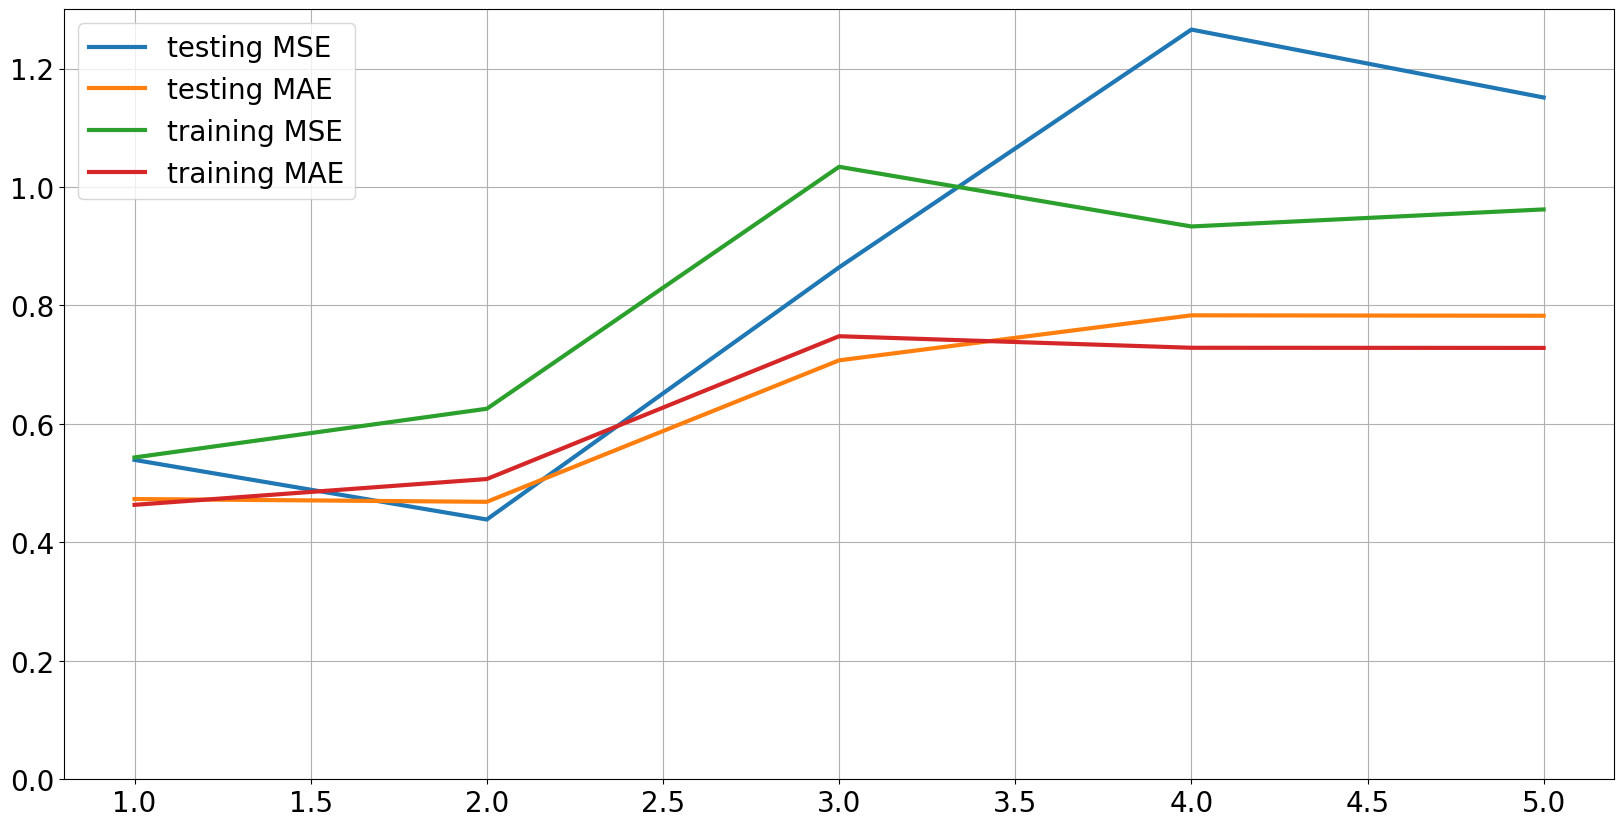

In [36]:
print(test_mean_mae_list)
print(test_mean_mse_list)
print(train_mean_mae_list)
print(train_mean_mse_list)
import matplotlib.pyplot as plt
x_axis=np.linspace(1,5,5)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(x_axis,test_mean_mse_list,"#1f77b4",linewidth=3,label="testing MSE")
plt.plot(x_axis,test_mean_mae_list,"#ff7f0e",linewidth=3,label="testing MAE")
plt.plot(x_axis,train_mean_mse_list,"#2ca02c",linewidth=3,label="training MSE")
plt.plot(x_axis,train_mean_mae_list,"#d62728",linewidth=3,label="training MAE")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 1.3) 
plt.legend(loc="upper left",fontsize=20)
plt.grid()
plt.show()

In [37]:
total_train_mae_mean = np.mean(train_mean_mae_list)
total_train_mse_mean = np.mean(train_mean_mse_list)
total_test_mae_mean = np.mean(test_mean_mae_list)
total_test_mse_mean = np.mean(test_mean_mse_list)

total_train_mae_std = np.std(train_mean_mae_list)
total_train_mse_std = np.std(train_mean_mse_list)
total_test_mae_std = np.std(test_mean_mae_list)
total_test_mse_std = np.std(test_mean_mse_list)
total_mean_dict = {'total_train_mae_mean':total_train_mae_mean, 'total_train_mse_mean':total_train_mse_mean, 'total_test_mae_mean':total_test_mae_mean, 'total_tset_mse_mean':total_test_mse_mean}
total_std_dict = {'total_train_mae_std':total_train_mae_std, 'total_train_mse_std':total_train_mse_std, 'total_test_mae_std':total_test_mae_std, 'total_tset_mse_std':total_test_mse_std}
print(total_mean_dict,total_std_dict)


{'total_train_mae_mean': 0.6350115103480973, 'total_train_mse_mean': 0.8196812346497058, 'total_test_mae_mean': 0.6429560189151095, 'total_tset_mse_mean': 0.8517717481349619} {'total_train_mae_std': 0.1233684735821775, 'total_train_mse_std': 0.1965637411355616, 'total_test_mae_std': 0.14326303451652397, 'total_tset_mse_std': 0.32543288963714917}
